# Agenda
- Introduction to supervised Learning
- Supervised Learning Algorithms
- Classification
- Regression
- OverFitting and Underfitting

#### Introduction to supervised Learning

Supervised Learning is a type of ML where the algorithm learns from labelled data. 


#### Supervised Learning Algorithms
- Linear Regression
- Logistic Regression
- Decision Tree
- Random Forest
- Support Vector Machine

### Preparation and Shaping of the data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('titanic.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.groupby(['Embarked'])['Fare'].mean()

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

In [9]:
df.groupby(['Embarked'])['Fare'].count()

Embarked
C    168
Q     77
S    644
Name: Fare, dtype: int64

In [10]:
df.groupby(['Embarked', 'Survived'])['Fare'].count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Fare, dtype: int64

In [11]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [12]:
# Data Preprocessing.
# Create a Column by the name TravelAlone which would have 0 or 1 as values if a person is without any sibsp and parch

In [13]:
df['TravelAlone'] = np.where((df['SibSp']+df['Parch'])>0,False,True).astype('uint8')

In [14]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


In [15]:
df['Title'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [16]:
#'Heikkinen, Miss. Laina'.split(',')[1].split('.')[0].strip()

In [17]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'TravelAlone', 'Title'],
      dtype='object')

In [18]:
df = df[['PassengerId',  'Pclass', 'Title','Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'TravelAlone','Survived' ]]

In [19]:
df.head()

,PassengerId,Pclass,Title,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TravelAlone,Survived
0,1,3,Mr,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,Mrs,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,3,Miss,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,Mrs,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,3,Mr,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0


In [20]:
# Dropping Unnecessary columns

In [21]:
df.drop(columns= ['PassengerId','Name', 'SibSp','Parch', 'Ticket', 'Cabin' ], inplace = True)

In [22]:
df.head()

,Pclass,Title,Sex,Age,Fare,Embarked,TravelAlone,Survived
0,3,Mr,male,22.0,7.2500,S,0,0
1,1,Mrs,female,38.0,71.2833,C,0,1
2,3,Miss,female,26.0,7.9250,S,1,1
3,1,Mrs,female,35.0,53.1000,S,0,1
4,3,Mr,male,35.0,8.0500,S,1,0


In [23]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [24]:
# Missing Values

In [25]:
df.isnull().sum()

Pclass           0
Title            0
Sex              0
Age            177
Fare             0
Embarked         2
TravelAlone      0
Survived         0
dtype: int64

In [26]:
df['Age'] = df.Age.fillna(df.Age.median())

In [27]:
df['Embarked'] = df.Embarked.fillna(df.Embarked.mode()[0])

In [28]:
df.Embarked.mode()[0]

'S'

In [29]:
df.isnull().sum()

Pclass         0
Title          0
Sex            0
Age            0
Fare           0
Embarked       0
TravelAlone    0
Survived       0
dtype: int64

In [30]:
df.Age.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [31]:
#Dated -  23 -06-2024

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df.head()

,Pclass,Title,Sex,Age,Fare,Embarked,TravelAlone,Survived
0,3,Mr,male,22.0,7.2500,S,0,0
1,1,Mrs,female,38.0,71.2833,C,0,1
2,3,Miss,female,26.0,7.9250,S,1,1
3,1,Mrs,female,35.0,53.1000,S,0,1
4,3,Mr,male,35.0,8.0500,S,1,0


In [33]:
newdf =  pd.get_dummies(df, columns= ['Pclass','Title', 'Sex', 'Embarked'], dtype = 'int')

In [34]:
newdf

,Age,Fare,TravelAlone,Survived,Pclass_1,Pclass_2,Pclass_3,Title_Capt,Title_Col,Title_Don,...,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,38.0,71.2833,0,1,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
2,26.0,7.9250,1,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,35.0,53.1000,0,1,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4,35.0,8.0500,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
887,19.0,30.0000,1,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
888,28.0,23.4500,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
889,26.0,30.0000,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [35]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 891 non-null    float64
 1   Fare                891 non-null    float64
 2   TravelAlone         891 non-null    uint8  
 3   Survived            891 non-null    int64  
 4   Pclass_1            891 non-null    int32  
 5   Pclass_2            891 non-null    int32  
 6   Pclass_3            891 non-null    int32  
 7   Title_Capt          891 non-null    int32  
 8   Title_Col           891 non-null    int32  
 9   Title_Don           891 non-null    int32  
 10  Title_Dr            891 non-null    int32  
 11  Title_Jonkheer      891 non-null    int32  
 12  Title_Lady          891 non-null    int32  
 13  Title_Major         891 non-null    int32  
 14  Title_Master        891 non-null    int32  
 15  Title_Miss          891 non-null    int32  
 16  Title_Ml

In [36]:
# Prepare Features and Target variables

In [37]:
X = newdf.drop(columns = ['Survived'])
y = newdf['Survived']

In [38]:
X.columns

Index(['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Title_Capt', 'Title_Col', 'Title_Don', 'Title_Dr', 'Title_Jonkheer',
       'Title_Lady', 'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mlle',
       'Title_Mme', 'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev',
       'Title_Sir', 'Title_the Countess', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

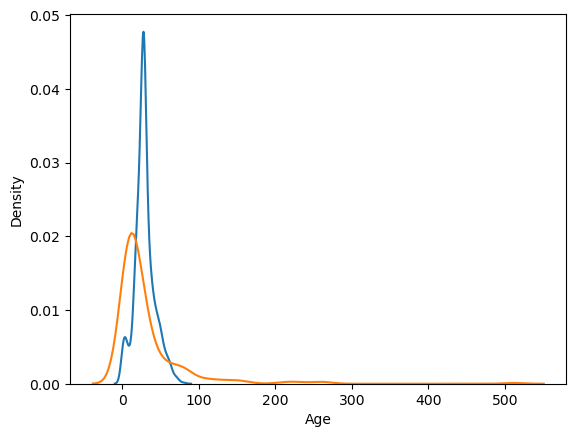

In [39]:
for col in ['Age', 'Fare']:
    sns.kdeplot(x = col, data = newdf)
plt.show()

In [40]:
X[['Age', 'Fare']].describe()

,Age,Fare
count,891.000000,891.000000
mean,29.361582,32.204208
std,13.019697,49.693429
min,0.420000,0.000000
25%,22.000000,7.910400
50%,28.000000,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


In [41]:
# Perform Normalization (MinMaxScaler)  Perform Standardization(Standard Scaler)

In [42]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [43]:
mm = MinMaxScaler()
trans_X = mm.fit_transform(X)
trans_X = pd.DataFrame(trans_X, columns = X.columns)

In [44]:
trans_X

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Title_Capt,Title_Col,Title_Don,Title_Dr,...,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.472229,0.139136,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.321438,0.015469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.434531,0.103644,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.434531,0.015713,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.334004,0.025374,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
887,0.233476,0.058556,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
888,0.346569,0.045771,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
889,0.321438,0.058556,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [45]:
trans_X[['Age', 'Fare']].describe()

,Age,Fare
count,891.000000,891.000000
mean,0.363679,0.062858
std,0.163605,0.096995
min,0.000000,0.000000
25%,0.271174,0.015440
50%,0.346569,0.028213
75%,0.434531,0.060508
max,1.000000,1.000000


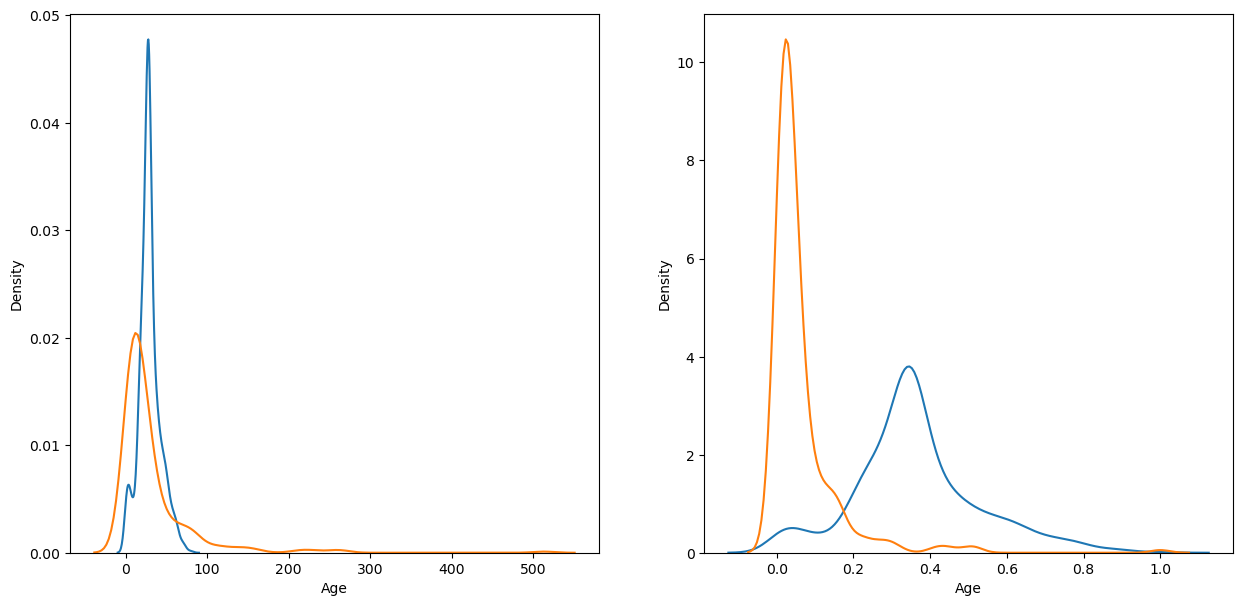

In [46]:
plt.figure(figsize = (15,7))
for col in ['Age', 'Fare']:
    plt.subplot(1,2,1)
    sns.kdeplot(x = col, data = X)
    plt.subplot(1,2,2)
    sns.kdeplot(x = col, data = trans_X)
plt.show()

In [47]:
sc = StandardScaler()
trans_X_sc = sc.fit_transform(trans_X)
trans_X_sc = pd.DataFrame(trans_X_sc, columns = X.columns)
trans_X_sc

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Title_Capt,Title_Col,Title_Don,Title_Dr,...,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,-0.565736,-0.502445,-1.231645,-0.565685,-0.510152,0.902587,-0.03352,-0.047431,-0.03352,-0.088986,...,-0.403962,-0.03352,-0.082339,-0.03352,-0.03352,-0.737695,0.737695,-0.482043,-0.307562,0.615838
1,0.663861,0.786845,-1.231645,1.767767,-0.510152,-1.107926,-0.03352,-0.047431,-0.03352,-0.088986,...,2.475480,-0.03352,-0.082339,-0.03352,-0.03352,1.355574,-1.355574,2.074505,-0.307562,-1.623803
2,-0.258337,-0.488854,0.811922,-0.565685,-0.510152,0.902587,-0.03352,-0.047431,-0.03352,-0.088986,...,-0.403962,-0.03352,-0.082339,-0.03352,-0.03352,1.355574,-1.355574,-0.482043,-0.307562,0.615838
3,0.433312,0.420730,-1.231645,1.767767,-0.510152,-1.107926,-0.03352,-0.047431,-0.03352,-0.088986,...,2.475480,-0.03352,-0.082339,-0.03352,-0.03352,1.355574,-1.355574,-0.482043,-0.307562,0.615838
4,0.433312,-0.486337,0.811922,-0.565685,-0.510152,0.902587,-0.03352,-0.047431,-0.03352,-0.088986,...,-0.403962,-0.03352,-0.082339,-0.03352,-0.03352,-0.737695,0.737695,-0.482043,-0.307562,0.615838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.181487,-0.386671,0.811922,-0.565685,1.960202,-1.107926,-0.03352,-0.047431,-0.03352,-0.088986,...,-0.403962,-0.03352,12.144958,-0.03352,-0.03352,-0.737695,0.737695,-0.482043,-0.307562,0.615838
887,-0.796286,-0.044381,0.811922,1.767767,-0.510152,-1.107926,-0.03352,-0.047431,-0.03352,-0.088986,...,-0.403962,-0.03352,-0.082339,-0.03352,-0.03352,1.355574,-1.355574,-0.482043,-0.307562,0.615838
888,-0.104637,-0.176263,-1.231645,-0.565685,-0.510152,0.902587,-0.03352,-0.047431,-0.03352,-0.088986,...,-0.403962,-0.03352,-0.082339,-0.03352,-0.03352,1.355574,-1.355574,-0.482043,-0.307562,0.615838
889,-0.258337,-0.044381,0.811922,1.767767,-0.510152,-1.107926,-0.03352,-0.047431,-0.03352,-0.088986,...,-0.403962,-0.03352,-0.082339,-0.03352,-0.03352,-0.737695,0.737695,2.074505,-0.307562,-1.623803


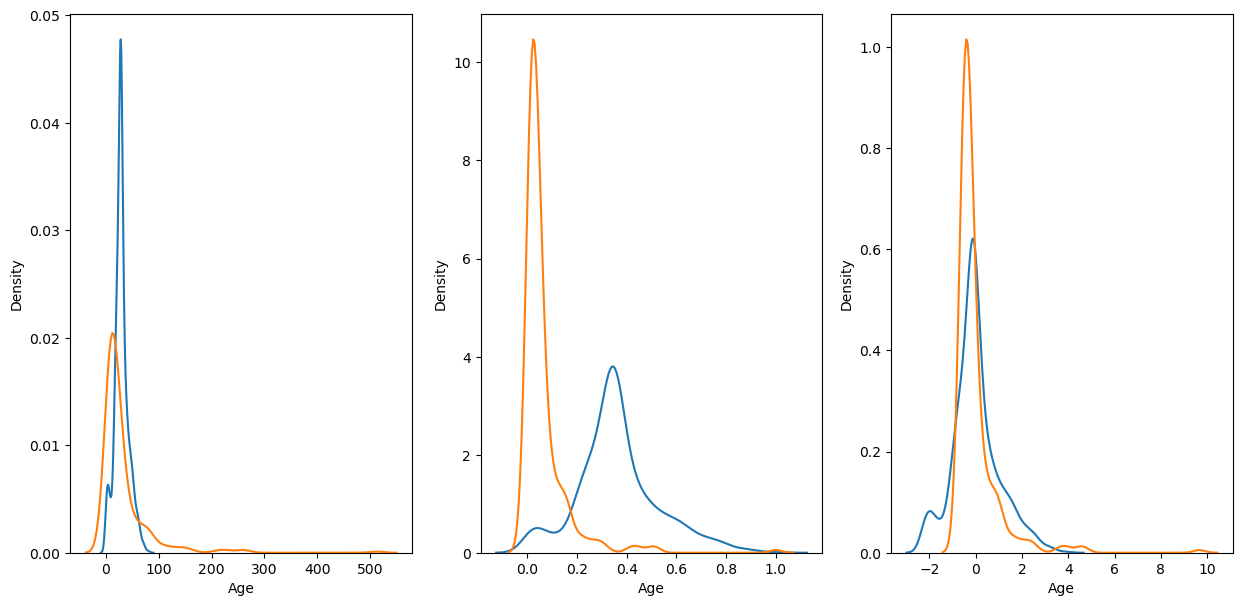

In [48]:
plt.figure(figsize = (15,7))
for col in ['Age', 'Fare']:
    plt.subplot(1,3,1)
    sns.kdeplot(x = col, data = X)
    plt.subplot(1,3,2)
    sns.kdeplot(x = col, data = trans_X)
    plt.subplot(1,3,3)
    sns.kdeplot(x = col, data = trans_X_sc)
    
plt.show()

In [49]:
trans_X_sc[['Age', 'Fare']].describe()

,Age,Fare
count,8.910000e+02,8.910000e+02
mean,1.913920e-16,1.196200e-17
std,1.000562e+00,1.000562e+00
min,-2.224156e+00,-6.484217e-01
25%,-5.657365e-01,-4.891482e-01
50%,-1.046374e-01,-3.573909e-01
75%,4.333115e-01,-2.424635e-02
max,3.891554e+00,9.667167e+00


In [50]:
X = trans_X_sc
y= y

# Supervised Learning Algorithms

There are 2 types of Supervised Learning Algorithms
- Classification
    - it is a supervised learning technique to identify the category of a new observations based on training data(predicting category). eg. email spam filter
- Regression 
    - it is a supervised learning technique to predict a continuous values, eg. predict price of house in a particular area.    
    

In [52]:
# Overfitting and Underfitting

# Detecting and Preventing Overfitting and underfitting 

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [55]:
X, y = make_classification(n_samples = 5000, n_features= 20, n_informative = 6, n_redundant =9, random_state= 25)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3, random_state = 25)

In [57]:
X_train.shape, y_train.shape

((3500, 20), (3500,))

In [58]:
X_test.shape, y_test.shape

((1500, 20), (1500,))

In [59]:
value =  list(range(1,20))
train_scores = []
test_scores = []

In [60]:
for i in value:
    dtc = DecisionTreeClassifier(max_depth = i)
    dtc.fit(X_train, y_train)
    y_train_pred = dtc.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_scores.append(train_accuracy)
    y_test_pred = dtc.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_scores.append(test_accuracy)
    print('-- %d , Training Accuracy : %.3f, Test Accuracy : %.3f'%(i, train_accuracy,test_accuracy))

-- 1 , Training Accuracy : 0.837, Test Accuracy : 0.834
-- 2 , Training Accuracy : 0.887, Test Accuracy : 0.893
-- 3 , Training Accuracy : 0.911, Test Accuracy : 0.918
-- 4 , Training Accuracy : 0.920, Test Accuracy : 0.925
-- 5 , Training Accuracy : 0.945, Test Accuracy : 0.923
-- 6 , Training Accuracy : 0.960, Test Accuracy : 0.936
-- 7 , Training Accuracy : 0.969, Test Accuracy : 0.934
-- 8 , Training Accuracy : 0.977, Test Accuracy : 0.939
-- 9 , Training Accuracy : 0.983, Test Accuracy : 0.937
-- 10 , Training Accuracy : 0.990, Test Accuracy : 0.933
-- 11 , Training Accuracy : 0.993, Test Accuracy : 0.931
-- 12 , Training Accuracy : 0.996, Test Accuracy : 0.926
-- 13 , Training Accuracy : 0.998, Test Accuracy : 0.923
-- 14 , Training Accuracy : 0.999, Test Accuracy : 0.927
-- 15 , Training Accuracy : 0.999, Test Accuracy : 0.929
-- 16 , Training Accuracy : 1.000, Test Accuracy : 0.933
-- 17 , Training Accuracy : 1.000, Test Accuracy : 0.920
-- 18 , Training Accuracy : 1.000, Test 

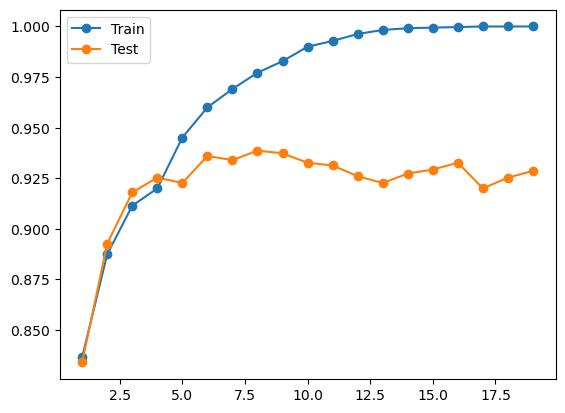

In [61]:
plt.plot(value, train_scores, '-o', label = 'Train')
plt.plot(value, test_scores, '-o', label = 'Test')
plt.legend()
plt.show()

In [62]:
from sklearn.tree import plot_tree, export_text

In [63]:
textform =  export_text(dtc)
print(textform)

|--- feature_1 <= -0.47
|   |--- feature_2 <= -2.46
|   |   |--- feature_9 <= 0.47
|   |   |   |--- feature_8 <= -0.62
|   |   |   |   |--- feature_4 <= 2.34
|   |   |   |   |   |--- feature_18 <= -1.24
|   |   |   |   |   |   |--- feature_0 <= -1.03
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_0 >  -1.03
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_18 >  -1.24
|   |   |   |   |   |   |--- feature_4 <= -1.36
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_4 >  -1.36
|   |   |   |   |   |   |   |--- feature_0 <= -3.59
|   |   |   |   |   |   |   |   |--- feature_17 <= -0.28
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_17 >  -0.28
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_0 >  -3.59
|   |   |   |   |   |   |   |   |--- feature_15 <= 1.66
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   | 

[Text(0.577724025618568, 0.9722222222222222, 'x[1] <= -0.474\ngini = 0.5\nsamples = 3500\nvalue = [1767.0, 1733.0]'),
 Text(0.24229253339172324, 0.9166666666666666, 'x[2] <= -2.462\ngini = 0.305\nsamples = 1915\nvalue = [1555, 360]'),
 Text(0.06586380556163783, 0.8611111111111112, 'x[9] <= 0.471\ngini = 0.378\nsamples = 198\nvalue = [50, 148]'),
 Text(0.04204072695423692, 0.8055555555555556, 'x[8] <= -0.621\ngini = 0.183\nsamples = 157\nvalue = [16, 141]'),
 Text(0.028027151302824613, 0.75, 'x[4] <= 2.341\ngini = 0.08\nsamples = 144\nvalue = [6, 138]'),
 Text(0.022421721042259687, 0.6944444444444444, 'x[18] <= -1.242\ngini = 0.067\nsamples = 143\nvalue = [5, 138]'),
 Text(0.011210860521129844, 0.6388888888888888, 'x[0] <= -1.029\ngini = 0.018\nsamples = 108\nvalue = [1, 107]'),
 Text(0.005605430260564922, 0.5833333333333334, 'gini = 0.0\nsamples = 107\nvalue = [0, 107]'),
 Text(0.016816290781694766, 0.5833333333333334, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.033632581563389

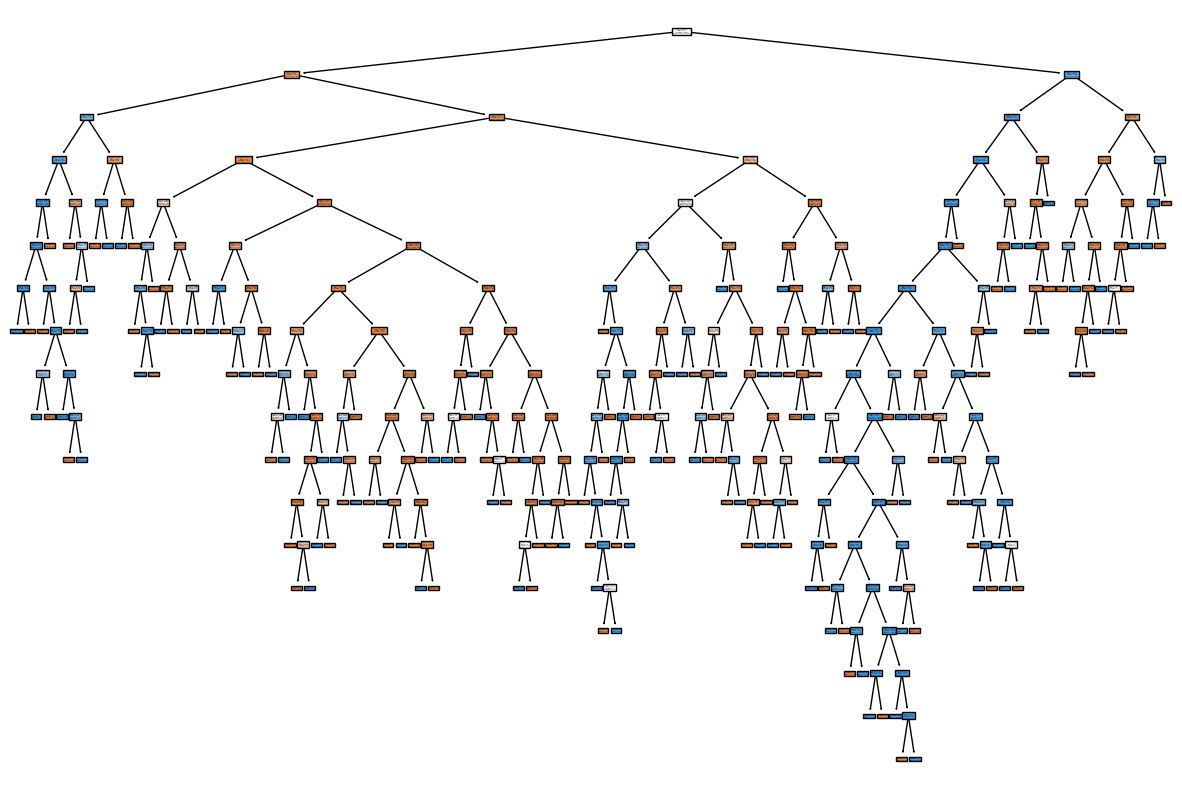

In [64]:
plt.figure(figsize = (15,10))
plot_tree(dtc, filled = True)

In [65]:
from sklearn.datasets import load_iris

In [66]:
bc =  load_iris()

In [67]:
X= bc.data
y= bc.target

In [68]:
# Split the data set
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size= 0.25, random_state = 25)

In [69]:
depths =  list(range(1,21))
train_score = []
test_score = []

In [70]:
for  i in depths:
    model =  DecisionTreeClassifier(max_depth =i, criterion = 'entropy')
    model.fit(X_train, y_train)
    train_yhat = model.predict(X_train)
    train_acc= accuracy_score(y_train, train_yhat)
    test_yhat = model.predict(X_test)
    test_acc= accuracy_score(y_test, test_yhat)
    train_score.append(train_acc)
    test_score.append(test_acc)
    print(f'> {i}, train : {train_acc}, test : {test_acc}')

> 1, train : 0.6964285714285714, test : 0.5789473684210527
> 2, train : 0.9642857142857143, test : 0.9473684210526315
> 3, train : 0.9821428571428571, test : 0.9473684210526315
> 4, train : 0.9821428571428571, test : 0.9473684210526315
> 5, train : 1.0, test : 0.8947368421052632
> 6, train : 1.0, test : 0.8947368421052632
> 7, train : 1.0, test : 0.8947368421052632
> 8, train : 1.0, test : 0.8947368421052632
> 9, train : 1.0, test : 0.8947368421052632
> 10, train : 1.0, test : 0.8947368421052632
> 11, train : 1.0, test : 0.8947368421052632
> 12, train : 1.0, test : 0.8947368421052632
> 13, train : 1.0, test : 0.8947368421052632
> 14, train : 1.0, test : 0.8947368421052632
> 15, train : 1.0, test : 0.8947368421052632
> 16, train : 1.0, test : 0.8947368421052632
> 17, train : 1.0, test : 0.8947368421052632
> 18, train : 1.0, test : 0.8947368421052632
> 19, train : 1.0, test : 0.8947368421052632
> 20, train : 1.0, test : 0.8947368421052632


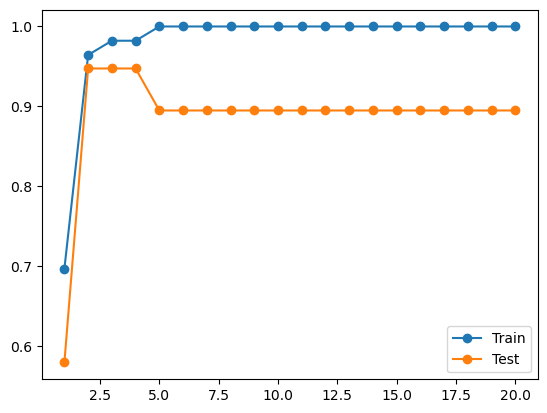

In [71]:
plt.plot(depths, train_score, '-o', label = 'Train')
plt.plot(depths, test_score, '-o', label = 'Test')
plt.legend()
plt.show()

In [72]:
print(np.array(train_score)- np.array(test_score))

[0.1174812  0.01691729 0.03477444 0.03477444 0.10526316 0.10526316
 0.10526316 0.10526316 0.10526316 0.10526316 0.10526316 0.10526316
 0.10526316 0.10526316 0.10526316 0.10526316 0.10526316 0.10526316
 0.10526316 0.10526316]


In [73]:
print(bc.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [74]:
pd.DataFrame([y_test, test_yhat]).T

,0,1
0,0,0
1,1,2
2,1,2
3,1,1
4,2,2
5,1,1
6,2,2
7,0,0
8,1,1
9,1,1


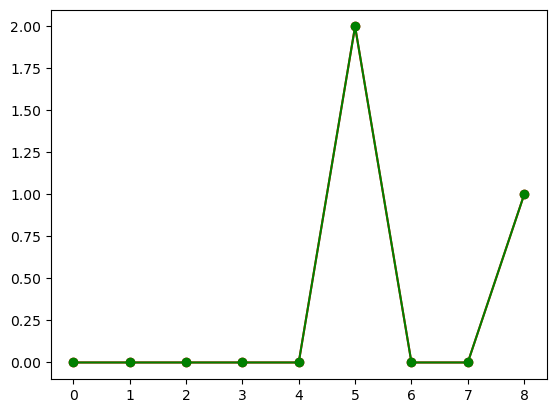

In [75]:
plt.plot(range(0,len(y_train[1:10])), y_train[1:10], '-o', color = 'red')
plt.plot(range(0,len(y_train[1:10])), train_yhat[1:10], '-o', color = 'green')

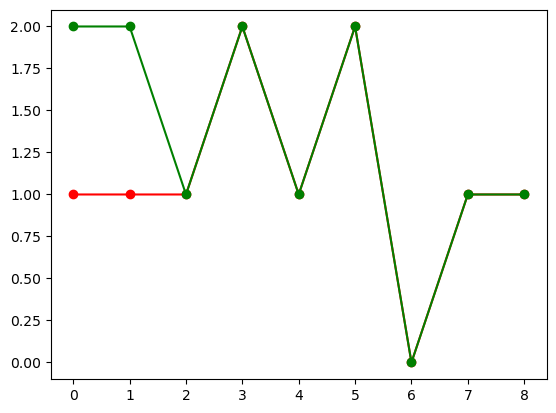

In [76]:
plt.plot(range(0,len(y_test[1:10])), y_test[1:10], '-o', color = 'red')
plt.plot(range(0,len(y_test[1:10])), test_yhat[1:10], '-o', color = 'green')

In [77]:
y_test[1:10]

array([1, 1, 1, 2, 1, 2, 0, 1, 1])

In [78]:
test_yhat[1:10]

array([2, 2, 1, 2, 1, 2, 0, 1, 1])

In [79]:
feature_names= bc.feature_names
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [80]:
textform =  export_text(model, feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
print(textform)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 5.35
|   |   |   |--- sepal width (cm) <= 2.55
|   |   |   |   |--- petal width (cm) <= 1.40
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal width (cm) >  1.40
|   |   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  2.55
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  5.35
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



In [81]:
iris = pd.DataFrame(bc.data, columns = bc.feature_names)
iris['target'] = bc.target

In [82]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [83]:
iris[iris['petal width (cm)']<=0.8]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


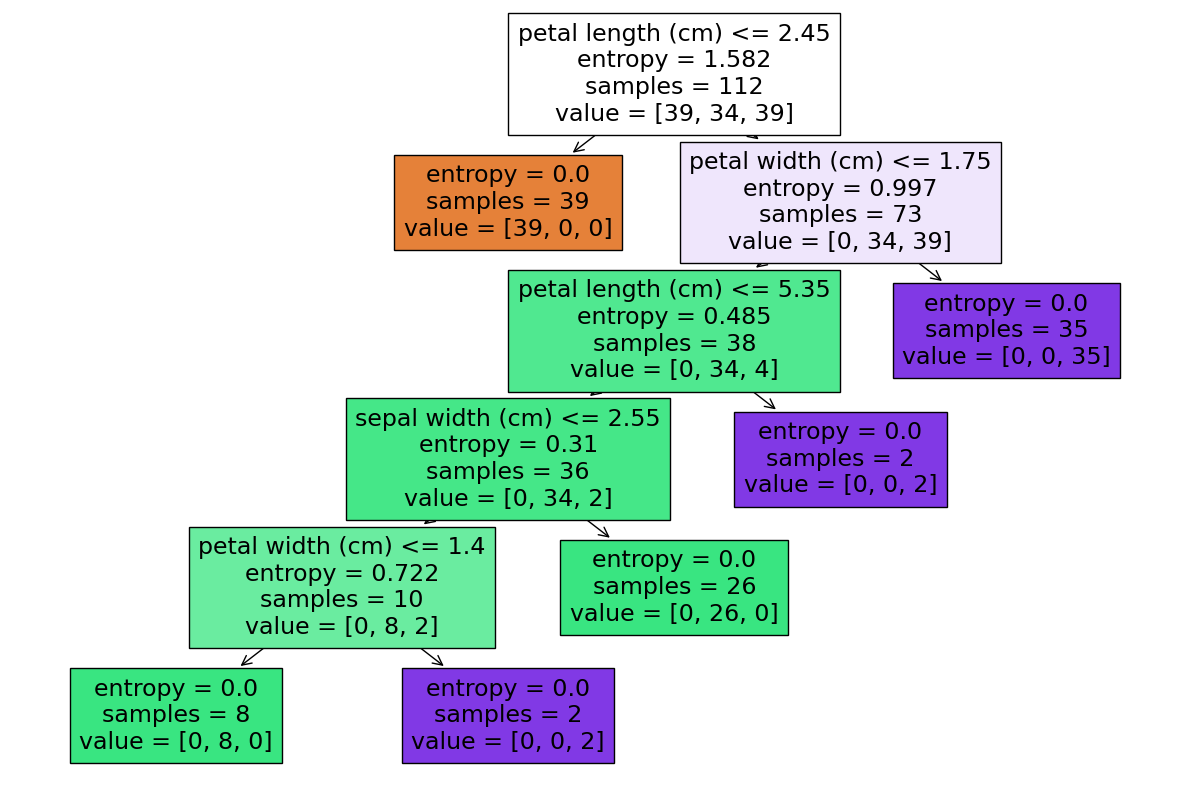

In [84]:
plt.figure(figsize = (15,10))
plot_tree(model, filled = True, feature_names = bc.feature_names)
plt.show()

In [85]:
# Number of Apples(A) = 5
# Number of Oranges(A) = 7
Entropy = (5/12) * np.log2(5/12) + (7/12) * np.log2(7/12)
print(Entropy)

-0.9798687566511528


In [86]:
#IG(Color) =  Entropy - [6/12*E(red) + 2/12 * E(G) + 4/12 * E(Y)]
Ered = (2/6)*np.log2(2/6) + (4/6)*np.log2(4/6)
Egr = (1/2)*np.log2(1/2) + (1/2)*np.log2(1/2)
Eyl = (2/4)*np.log2(2/4) + (2/4)*np.log2(2/4)

In [87]:
ig = Entropy - (6/12*Ered + 2/12 * Egr+ 4/12 * Eyl)

In [88]:
print(ig)

-0.020720839623908027


In [89]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [90]:
df = pd.read_csv('position_salaries.csv')

In [91]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [92]:
X = df.iloc[:,1:2]
y = df.iloc[:,2]

In [93]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.2,random_state=25)

In [94]:
xtest

,Level
5,6
1,2


Linear Regression

In [96]:
lr = LinearRegression()

In [97]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [98]:
lr.coef_,lr.intercept_

(array([85834.84573503]), -217404.71869328484)

In [99]:
predict_test = lr.predict(xtest)

In [100]:
ytest

5    150000
1     50000
Name: Salary, dtype: int64

In [101]:
predict_train = lr.predict(xtrain)

In [102]:
ytrain

3      80000
8     500000
0      45000
2      60000
9    1000000
7     300000
6     200000
4     110000
Name: Salary, dtype: int64

In [103]:
ytrain.mean()

286875.0

In [104]:
rmse_train = np.sqrt(mean_squared_error(ytrain,predict_train))

In [105]:
rmse_test = np.sqrt(mean_squared_error(ytest,predict_test))

In [106]:
from sklearn.metrics import r2_score

In [107]:
r2_score(ytest,predict_test)

-5.190448252805487

In [108]:
r2_score(ytrain,predict_train)

0.6804519008272936

In [109]:
plt.scatter(x,y)
plt.show()

NameError: name 'x' is not defined

Polynomial Regression

In [112]:
from sklearn.preprocessing import PolynomialFeatures

In [114]:
polyf = PolynomialFeatures(degree = 6)
polyf = polyf.fit(X)
poly_x = polyf.transform(X)


In [116]:
poly_x.astype(int)

array([[      1,       1,       1,       1,       1,       1,       1],
       [      1,       2,       4,       8,      16,      32,      64],
       [      1,       3,       9,      27,      81,     243,     729],
       [      1,       4,      16,      64,     256,    1024,    4096],
       [      1,       5,      25,     125,     625,    3125,   15625],
       [      1,       6,      36,     216,    1296,    7776,   46656],
       [      1,       7,      49,     343,    2401,   16807,  117649],
       [      1,       8,      64,     512,    4096,   32768,  262144],
       [      1,       9,      81,     729,    6561,   59049,  531441],
       [      1,      10,     100,    1000,   10000,  100000, 1000000]])

In [118]:
poly_reg = LinearRegression()
poly_reg.fit(poly_x,y)

LinearRegression()

In [120]:
poly_reg.predict(poly_x)

array([ 45190.55943813,  49086.82983497,  61383.44988351,  79877.62237762,
       108808.85780803, 149282.05128119, 203940.55944048, 295889.27738951,
       501867.71561782, 999673.07692873])

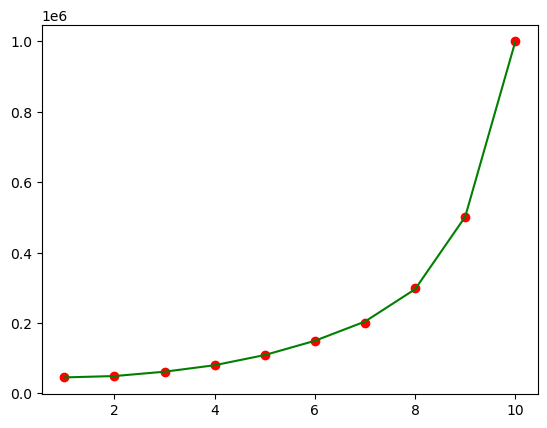

In [122]:
plt.scatter(X,y,color = 'red')
plt.plot(X,poly_reg.predict(poly_x),color='green')
plt.show()

In [124]:
test_input = polyf.transform([[11]])

In [126]:
poly_reg.predict(test_input)

array([2129833.3333695])

In [130]:
poly_reg.coef_

array([ 0.00000000e+00, -8.29439977e+04,  6.58964015e+04, -2.43819566e+04,
        4.92908654e+03, -4.95432692e+02,  1.97916667e+01])

In [128]:
poly_reg.intercept_

82166.66667932179

In [110]:
df = pd.read_csv('tita.csv',index_col = 0)

In [132]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

In [134]:
from sklearn.linear_model import LogisticRegression

In [136]:
logr = LogisticRegression()
logr.fit(X,y)

LogisticRegression()

In [138]:
y_predict = logr.predict(X)

In [148]:
y_predict[:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [146]:
y[:10].values

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [152]:
logr.score(X,y)

0.819304152637486

In [156]:
from sklearn.metrics import confusion_matrix    

In [158]:
confusion_matrix(y,y_predict)

array([[476,  73],
       [ 88, 254]], dtype=int64)

In [160]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [166]:
pd.Series(y_predict).value_counts()

0    564
1    327
dtype: int64

In [170]:
logr.predict_proba(X)

array([[0.95230091, 0.04769909],
       [0.04981683, 0.95018317],
       [0.46541407, 0.53458593],
       ...,
       [0.61179111, 0.38820889],
       [0.41462818, 0.58537182],
       [0.89759725, 0.10240275]])

In [182]:
data = df[df['Survived'] != pd.Series(y_predict)]
index = df[df['Survived'] != pd.Series(y_predict)].index

In [184]:
df.iloc[index[0:2]]

,Age,Fare,TravelAlone,Survived,Pclass_1,Pclass_2,Pclass_3,Title_Capt,Title_Col,Title_Don,...,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
14,14.0,7.8542,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
16,2.0,29.1250,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [180]:
logr.predict_proba(data.drop(columns = ['Survived']))

array([[0.39147919, 0.60852081],
       [0.43202537, 0.56797463],
       [0.77745719, 0.22254281],
       [0.4477936 , 0.5522064 ],
       [0.80253587, 0.19746413],
       [0.57811677, 0.42188323],
       [0.48835408, 0.51164592],
       [0.41345322, 0.58654678],
       [0.87728036, 0.12271964],
       [0.16255766, 0.83744234],
       [0.36884329, 0.63115671],
       [0.57811677, 0.42188323],
       [0.42760796, 0.57239204],
       [0.5733546 , 0.4266454 ],
       [0.54899014, 0.45100986],
       [0.93234597, 0.06765403],
       [0.93122116, 0.06877884],
       [0.52509433, 0.47490567],
       [0.4779912 , 0.5220088 ],
       [0.92972741, 0.07027259],
       [0.37971322, 0.62028678],
       [0.27094235, 0.72905765],
       [0.47466092, 0.52533908],
       [0.4475729 , 0.5524271 ],
       [0.92289995, 0.07710005],
       [0.38794011, 0.61205989],
       [0.28943975, 0.71056025],
       [0.92806011, 0.07193989],
       [0.49055706, 0.50944294],
       [0.6049537 , 0.3950463 ],
       [0.

In [188]:
pd.Series(y_predict).iloc[index[0:2]]

14    1
16    1
dtype: int64

In [196]:
logr.predict_proba(data.iloc[index[0:2]].drop(columns=['Survived']))

array([[0.54899014, 0.45100986],
       [0.93122116, 0.06877884]])

# Support Vector Machine

In [205]:
from sklearn.svm  import SVR

# Decision Tree Regression